# A base de dados

### Carregando o dataset

In [1]:
from google.colab import files
files.upload()

Saving Bicicletas.csv to Bicicletas.csv


{'Bicicletas.csv': b'clima,temperatura,bicicletas_alugadas\n2,0.363625,985\n2,0.35373899999999997,801\n1,0.189405,1349\n1,0.21212199999999998,1562\n1,0.22926999999999997,1600\n1,0.23320900000000003,1606\n2,0.208839,1510\n2,0.162254,959\n1,0.116175,822\n1,0.15088800000000002,1321\n2,0.19146400000000002,1263\n1,0.160473,1162\n1,0.150883,1406\n1,0.188413,1421\n2,0.248112,1248\n1,0.234217,1204\n2,0.176771,1000\n2,0.23233299999999998,683\n2,0.29842199999999997,1650\n2,0.25505,1927\n1,0.157833,1543\n1,0.0790696,981\n1,0.09883910000000001,986\n1,0.11793,1416\n2,0.234526,1985\n3,0.2036,506\n1,0.2197,431\n2,0.22331700000000002,1167\n1,0.212126,1098\n1,0.250322,1096\n2,0.18625,1501\n2,0.23453000000000002,1360\n2,0.254417,1526\n1,0.177878,1550\n2,0.22858699999999998,1708\n2,0.243058,1005\n1,0.291671,1623\n1,0.303658,1712\n1,0.198246,1530\n2,0.144283,1605\n1,0.14954800000000001,1538\n1,0.213509,1746\n1,0.232954,1472\n1,0.324113,1589\n1,0.39835,1913\n1,0.254274,1815\n1,0.3162,2115\n1,0.428658,2475\

In [2]:
import pandas as pd

dados = pd.read_csv('Bicicletas.csv')

### Conhecendo a base de dados

In [3]:
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [4]:
dados.shape

(731, 3)

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'temperatura')

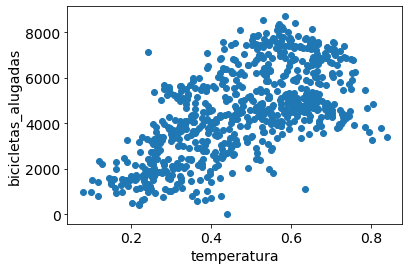

In [8]:
#Plotando o gráfico de correlação
plt.rcParams.update({'font.size': 14})
plt.scatter(dados['temperatura'],dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')

Text(0.5, 0, 'temperatura')

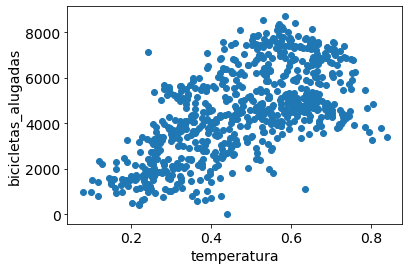

In [7]:
#Plotando o gráfico de correlação
plt.rcParams.update({'font.size': 14})
plt.scatter(dados['temperatura'],dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')

### Normalizando a base de dados

In [16]:
import numpy as np

In [17]:
#Colocando apenas os valores da serie pandas em y
y = dados['bicicletas_alugadas'].values

In [23]:
#Colocando apenas os valores do DataFrame pandas em x
X = dados[['clima','temperatura']].values
print(X)
print("+++++++++++++++++++++++")
print(X[0])

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 ...
 [2.       0.2424  ]
 [1.       0.2317  ]
 [2.       0.223487]]
+++++++++++++++++++++++
[2.       0.363625]


In [19]:
X = X/np.amax(X,axis=0)
print(X)
print("+++++++++++++++++++++++")
print(X[0])

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]
+++++++++++++++++++++++
[0.66666667 0.43242565]


In [20]:
ymax=np.amax(y)
y = y/ymax
print(y[0:10])

[0.11303649 0.09192105 0.15480835 0.17925178 0.18361258 0.18430112
 0.17328437 0.11005279 0.09433096 0.15159513]


In [24]:
def sigmoide(soma):
  
  return 1/(1+np.exp(-soma))

In [25]:
#Se o valor for negativo retorna 0, se não retorna o proprio valor
def relu(soma):
  
  return np.maximum(0,soma)

In [26]:
# 2 nodos de entrada; 1 camada escondida com 50 nodos; uma camada de saída com uma saída.
# 2input  50 nodos
#         ()
#   /       \
# ()-     ()- (output)
#   \     ()/
#   /     .
# ()-     .
#   \     ()
arquitetura = [{"dim_entrada":2, "dim_saida":50, "ativacao":"relu"},
               {"dim_entrada":50, "dim_saida":1, "ativacao":"sigmoide"}
]

In [28]:
def inicia_camadas(arquitetura, seed = 99):
  
  np.random.seed(seed)
  
  #camada de entrada não é camada
  numero_de_camadas = len(arquitetura)

  valores_parametros = {}

  for indice, camada in enumerate(arquitetura):
    # para indice não começar com o valor 0
    indice_camada = indice + 1

    tamanho_camada_entrada = camada["dim_entrada"]
    tamanho_camada_saida = camada["dim_saida"]

    #Peso camada = algo randomico
    valores_parametros['P' + str(indice_camada)] = np.random.randn(tamanho_camada_saida, tamanho_camada_entrada)

    valores_parametros['B' + str(indice_camada)] = np.random.randn(tamanho_camada_saida, 1) * 0.1

    return valores_parametros

In [29]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
  
  Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual

  if ativacao is "relu":
    func_ativacao = relu
  elif ativacao is "sigmoide":
    func_ativacao = sigmoide

  return func_ativacao(Saida_atual), Saida_atual

In [30]:
def propaga_total(X, valores_parametros, arquitetura):
  
  memoria = {}

  Ativado_atual = X

  for indice, camada in enumerate(arquitetura):

    indice_camada = indice + 1
    Ativado_anterior = Ativado_atual

    func_ativacao_atual = camada["ativacao"]

    Pesos_atual = valores_parametros["P" + str(indice_camada)]
    Bias_atual = valores_parametros["B" + str(indice_camada)]

    Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, 
                       Bias_atual, func_ativacao_atual)
    
    memoria["A" + str(indice)] = Ativado_anterior
    memoria["Z" + str(indice_camada)] = Saida_atual

    #Ativado atual na hora deste retorno será a saída da rede
    return Ativado_atual, memoria

In [31]:
valores_parametros = inicia_camadas(arquitetura, seed=99)

In [32]:
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [33]:
y_estimado[0,0]

0.35465105360797555

In [34]:
y_estimado[0,0]*ymax

3090.429281139899

In [36]:
y[0]*ymax

985.0000000000001

In [37]:
def valor_de_custo(Y_predito, Y):
  m = Y_predito.shape[1]
  custo = -1/m *(np.dot(Y,np.log(Y_predito.T) + np.dot(1-Y,np.log(1 - Y_predito).T)))
  return np.squeeze(custo)

In [ ]:
def atualiza(valores_parametros, gradientes, arquitetura, taxa_aprendizagem):
  for indice_camada, camada in enumerate(arquitetura, 1):
    valores_parametros["P", str(indice_camada)] -= taxa_aprendizagem * gradientes[
                                                    "dP" + str[indice_camada]                              
    ]
    valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradientes[
                                                    "dB" + str(indice_camada)                               ""
    ]
    return valores_parametros